In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_13_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_13_4.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 130, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/130
100000/100000 - 3s - loss: 0.2511 - accuracy: 0.8980 - val_loss: 0.2105 - val_accuracy: 0.9136
Epoch 2/130
100000/100000 - 2s - loss: 0.2072 - accuracy: 0.9135 - val_loss: 0.2038 - val_accuracy: 0.9138
Epoch 3/130
100000/100000 - 2s - loss: 0.1972 - accuracy: 0.9146 - val_loss: 0.1905 - val_accuracy: 0.9168
Epoch 4/130
100000/100000 - 2s - loss: 0.1798 - accuracy: 0.9224 - val_loss: 0.1719 - val_accuracy: 0.9271
Epoch 5/130
100000/100000 - 2s - loss: 0.1602 - accuracy: 0.9308 - val_loss: 0.1523 - val_accuracy: 0.9330
Epoch 6/130
100000/100000 - 2s - loss: 0.1430 - accuracy: 0.9358 - val_loss: 0.1362 - val_accuracy: 0.9389
Epoch 7/130
100000/100000 - 2s - loss: 0.1287 - accuracy: 0.9409 - val_loss: 0.1289 - val_accuracy: 0.9418
Epoch 8/130
100000/100000 - 2s - loss: 0.1174 - accuracy: 0.9459 - val_loss: 0.1169 - val_accuracy: 0.9468
Epoch 9/130
100000/100000 - 2s - loss: 0.1078 - accuracy: 0.9510 - val_loss: 0.1061 - val_accu

Epoch 77/130
100000/100000 - 2s - loss: 0.0181 - accuracy: 0.9936 - val_loss: 0.0572 - val_accuracy: 0.9866
Epoch 78/130
100000/100000 - 2s - loss: 0.0157 - accuracy: 0.9943 - val_loss: 0.0612 - val_accuracy: 0.9860
Epoch 79/130
100000/100000 - 2s - loss: 0.0196 - accuracy: 0.9931 - val_loss: 0.0652 - val_accuracy: 0.9846
Epoch 80/130
100000/100000 - 2s - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.0587 - val_accuracy: 0.9866
Epoch 81/130
100000/100000 - 2s - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0604 - val_accuracy: 0.9859
Epoch 82/130
100000/100000 - 2s - loss: 0.0181 - accuracy: 0.9936 - val_loss: 0.0680 - val_accuracy: 0.9841
Epoch 83/130
100000/100000 - 2s - loss: 0.0171 - accuracy: 0.9939 - val_loss: 0.0602 - val_accuracy: 0.9860
Epoch 84/130
100000/100000 - 2s - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0650 - val_accuracy: 0.9843
Epoch 85/130
100000/100000 - 2s - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0675 - val_accuracy: 0.9841
Epoch 86/130
100000/100000 -

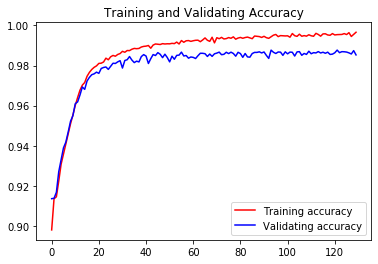

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_13_4_model.h5')